# Modelo de regresion logistica para analisis de datos dataset del Titanic<br>
## Importacion de librerias.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [54]:
# Creacion de variables donde se cargaran los dataset del "Titanic Dataset"
Titanic = pd.read_csv('C:/Users/Jhon/Documents/UNAD/9_semestre/Analisis_de_datos/Tarea_5/Titanic/train.csv')

In [56]:
Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análisis de variables del dataset para realizacion de analisis exploratorio.
`PassengerID` = Numero de identificacion de cada pasajero, autoincrementado en 1.<br>
`Survived` = Supervivencia 1 = si o 2 = no.<br>
`Pclass` = Clase de sociedad econocomica del pasajero 1a = Superior, 2do = Medio, 3a = Baja.<br>
`Name` = Nombre del pasajero.<br>
`Sex` = Sexo del pasajero. <br>
`Age` = Edad del pasajero.<br>
`SibSp` = Cantidad de familiares Hermanos, hermanastros y esposos en el barco.<br>
`Parch` = Cantidad de familiares Padres, Madres e hijos.<br>
`Ticket` = Numero de ticket del pasajero.<br>
`Fare` = Tarifa pagada por el pasajero.<br>
`Cabin` = Numero de cabina del pasajero.<br>
`Embarked` = Puerto donde embarco el pasajero C = Cherbourg, Q = Queenstown, S = Southampton.<br>


In [58]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Datos atipicos')

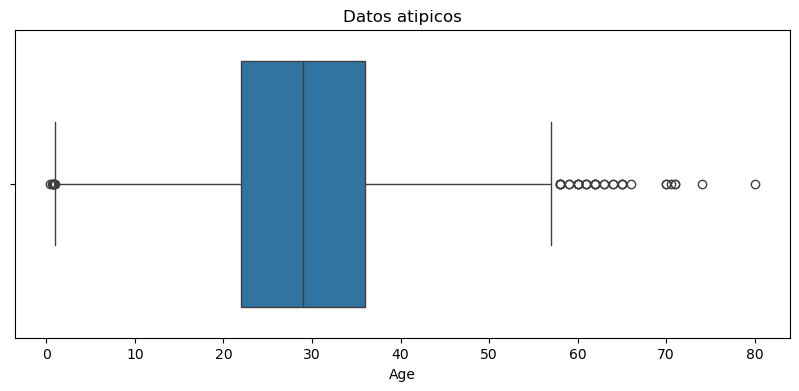

In [174]:
#Identificación de datos atipicos variable edad
plt.figure(figsize=(10, 4))
sns.boxplot(x=Titanic['Age'])
plt.title('Datos atipicos', fontsize=12 )

No se identifican valores atipicos ya que en el titanic se transportaban bebes desde 4 meses, hasta personas mayores de 80 años

Text(0.5, 1.0, 'Datos atipicos')

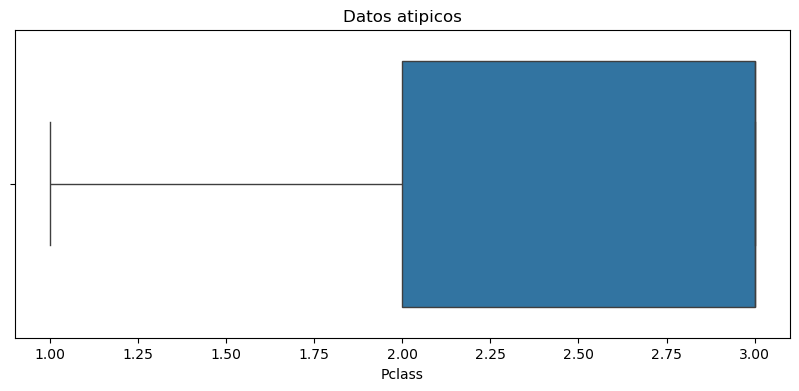

In [60]:
#Identificación de datos atipicos variable Pclass
plt.figure(figsize=(10, 4))
sns.boxplot(x=Titanic['Pclass'])
plt.title('Datos atipicos', fontsize=12 )

No se identifican valores atipicos

Text(0.5, 1.0, 'Datos atipicos')

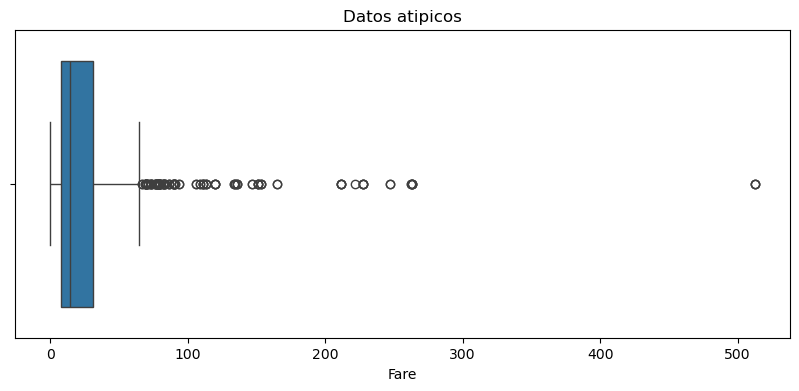

In [62]:
#Identificación de datos atipicos variable Fare
plt.figure(figsize=(10, 4))
sns.boxplot(x=Titanic['Fare'])
plt.title('Datos atipicos', fontsize=12 )

In [ ]:
No se identifican valores atipicos, solo se identifica que algunas personas pagaron tarifas gigantes por poder obtener un ticket en el titanic

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

### Identificacion de registros con valor de NaN en la variable de cabina

In [74]:
print("Cantidad de Registros con NaN en Cabin: ",Titanic['Cabin'].isna().sum())

Cantidad de Registros con NaN en Cabin:  687


### Se implementa un funcion llamada generar_clase la cual retornara un valor de B entre 1 y 50 random, y Asi de manera Sucesivamente de acuerdo a la clase del pasajero.

In [80]:
def generar_cabina(Pclass):
    if Pclass == 1:
        return f"B{random.randint(1, 50)}"
    elif Pclass == 2:
        return f"C{random.randint(1, 50)}"
    elif Pclass == 3:
        return f"D{random.randint(1, 50)}"

# Completar NaN con cabinas aleatorias
Titanic['Cabin'] = Titanic.apply(lambda row: generar_cabina(row['Pclass']) if pd.isna(row['Cabin']) else row['Cabin'], axis=1)

### Idententificacion nuevamente de si todos los registros de la columna de cabina fueron remplazados correctamente.

In [82]:
print("Cantidad de Registros con NaN en Cabin: ",Titanic['Cabin'].isna().sum())

Cantidad de Registros con NaN en Cabin:  0


### Identificacion de valores en blanco en la variable de Edad

In [100]:
print("Cantidad de Registros en blanco en Age: ",Titanic['Age'].isnull().sum())

Cantidad de Registros en blanco en Age:  177


### Remplazo de valores en blanco de manera random manteniendo los valores entre el rango de la media de la columna

In [102]:
Titanic['Age'] = Titanic['Age'].apply(lambda x: random.randint(20, 40) if pd.isna(x) else x)

### Idententificacion nuevamente de si todos los registros de la columna edad de  fueron remplazados correctamente.

In [104]:
print("Cantidad de Registros en blanco en Age: ",Titanic['Age'].isnull().sum())

Cantidad de Registros en blanco en Age:  0


### Identificancion de la columna de embarcamiento y se remplazaran los valores faltantes por C

In [111]:
Titanic['Embarked'] = Titanic['Embarked'].apply(lambda x: 'C' if pd.isna(x) else x)

### Idententificacion si todos los registros de la columna de embarcacion fueron remplazados correctamente.

In [117]:
print("Cantidad de Registros en blanco en Embarked: ",Titanic['Embarked'].isnull().sum())

Cantidad de Registros en blanco en Embarked:  0


### Se remplazan los valores de Female por 1 y Male por 0 en la variable de sexo para entrenar el modelo

In [146]:
Titanic['Sex'] = Titanic['Sex'].map({'female': 1, 'male': 0})

### Se remplazan los valores de embarcamiento de C por 0, Q por 1, S por 2

In [156]:
Titanic['Embarked'] = Titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [158]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


### No se identifican columnas con datos faltantes.

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

### Selecciono la variable de supervivencia para entrenar el modelo

In [122]:
Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [160]:
# Porcentaje de datos para (train) = 80% y (test) = 20%
# Se crean variables X y Y para almacenar la información del entrenamiento

X = Titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
Y = Titanic['Survived'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

### Se eliminan las columnas de supervivencia, nombre, ticket y cabina.

In [162]:
print (X_train)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
502          503       3    1  25.0      0      0   7.6292         1
464          465       3    0  34.0      0      0   8.0500         2
198          199       3    1  39.0      0      0   7.7500         1
765          766       1    1  51.0      1      0  77.9583         2
421          422       3    0  21.0      0      0   7.7333         1
..           ...     ...  ...   ...    ...    ...      ...       ...
131          132       3    0  20.0      0      0   7.0500         2
490          491       3    0  35.0      1      0  19.9667         2
528          529       3    0  39.0      0      0   7.9250         2
48            49       3    0  27.0      2      0  21.6792         0
80            81       3    0  22.0      0      0   9.0000         2

[712 rows x 8 columns]


### En variable de train se ingresa solamente la columna de supervivencia.

In [130]:
print (Y_train)

502    0
464    0
198    1
765    1
421    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 712, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [164]:
#Modelo que se aplicara de regresion logistica, haciendo uso de la libreria liblinear
regresion_Titanic = LogisticRegression(solver = "liblinear")
regresion_Titanic.fit (X_train , Y_train)   

# Creacion del modelo de prediccion
Prediccion = regresion_Titanic.predict(X_test)

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [166]:
#obtener los resultados de desempeño del modelo dee regresion
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

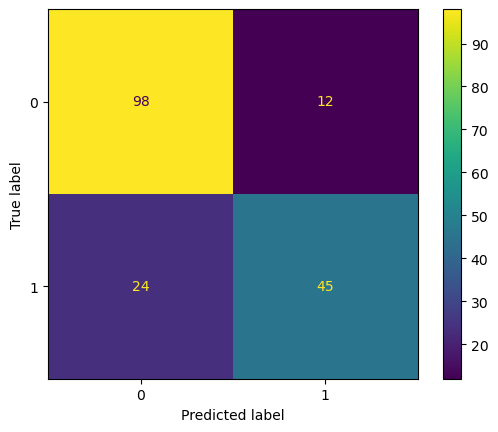

In [168]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

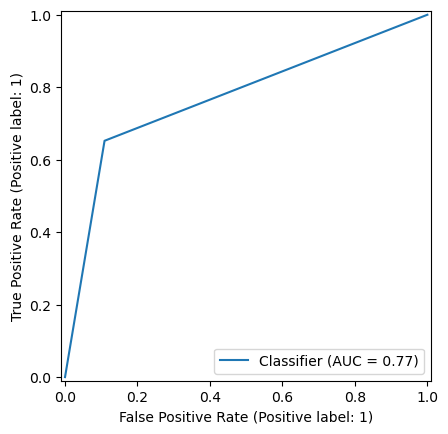

In [170]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

La evaluación realizada al modelo de regresión logística por medio del análisis de precisión, recall, F1-score

Precisión: El modelo nos indica una precisión del 0.80 en los pasajeros que fallecieron y 0.79 en casos que los pasajeros sobrevivieron, esto nos indica que el entrenamiento del modelo haciendo uso del 80% de los datos cuenta con una alta capacidad de identificar correctamente los casos en los que una persona fallecio o sobrevivio en la tragedia del titanic.

Recall: El recall nos indica que el modelo de regresión logística identifico 89% de los casos donde no sobrevivio un pasajero y el 65% de los casos donde los pasajeros si sobrevivieron, lo que nos indica que el modelo identifica con facilidad los casos donde no sobrevivieron pasajeros pudiendo ser por la ubicacion y estrato social, pero no logra identificar correctamente el de supervivencia por que las variables fueron mas como la ubicacion precisa al momento del accidente.

F1-Score: El F1-score es la media armónica entre precisión y recall, El F1-score presentado por el modelo de regresión logístico es de 0.84 para los casos de fallecimiento y 0.71 para los casos de supervivencia, esto nos indica un buen equilibrio entre la identificación correcta de los casos.

En cuanto a la matriz de confusión podemos interpretar lo siguiente:

Si analizamos los resultados de la matriz de confusión se puede evaluar que el modelo de regresión logística: En 98 casos dijo que un pasajero no sobrevivio y acierto correctamente. En 12 casos dijo que un pasajero falleceria pero en realidad sobrevivio. En 45 casos dijo que un pasajero sobreviviria y acierto correctamente. En 24 casos dijo que un pasajero sobreviviria pero fallo.

En cuanto a la curva de precisión del modelo de regresión logística: Se puede identificar que el AUC = 0.77 esto nos quiere indicar que el umbral de clasificaciones correctas en de un 77% tal y como también en la exactitud total.
